source: https://www.kaggle.com/datasets/kmader/mias-mammography

In [1]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random

import torch
from torchvision import datasets
import torchvision.transforms as transforms
from torchvision.io import read_image
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import os
import cv2
import glob
from skimage import io

from skimage import data
from skimage import filters
from skimage.color import rgb2gray
from skimage.io import imread

In [2]:
df = pd.read_csv('./../Datasets/MIAS_mammography/Info.txt', sep=" ").drop('Unnamed: 7',axis=1)
df.head(5)

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,mdb003,D,NORM,NaN,NaN,NaN,NaN
3,mdb004,D,NORM,NaN,NaN,NaN,NaN
4,mdb005,F,CIRC,B,477.0,133.0,30.0


In [3]:
df['CLASS'] = [0 if x == 'NORM' else 1 for x in df['CLASS']]
df.head()

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,1,B,535.0,425.0,197.0
1,mdb002,G,1,B,522.0,280.0,69.0
2,mdb003,D,0,NaN,NaN,NaN,NaN
3,mdb004,D,0,NaN,NaN,NaN,NaN
4,mdb005,F,1,B,477.0,133.0,30.0


322


/home/carlos/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


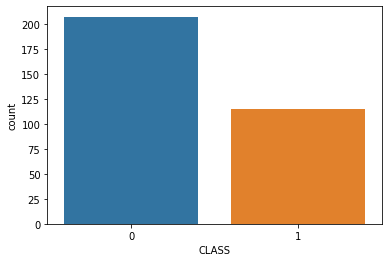

In [4]:
labels = df.drop_duplicates(subset=['REFNUM'])['CLASS']
sns.countplot(labels)

print(len(labels))

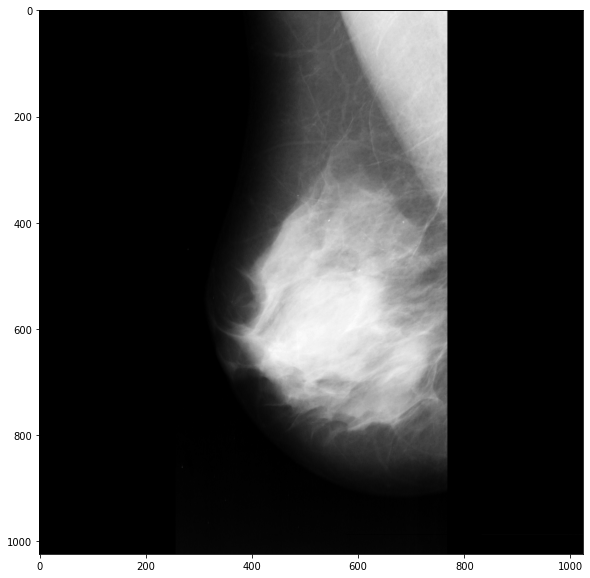

In [4]:
img = plt.imread('./../Datasets/MIAS_mammography/all-mias/mdb001.pgm')
fig = plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')
plt.show()

In [5]:
path='./../Datasets/MIAS_mammography/all-mias/'
images_path=[]
all_imgs = sorted(os.listdir(path))
for i in all_imgs:
    if '.pgm' in i:
        images_path.append('./../MIAS_mammography/' + i)
